In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [71]:
dataset=pd.read_excel("Superstore_USA.xlsx")
dataset.head(5)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [3]:
dataset.shape

(9426, 24)

In [4]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [5]:
dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean())

# Order Priority

In [6]:
dataset["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [7]:
dataset["Order Priority"].unique()

In [8]:
dataset["Order Priority"]=dataset["Order Priority"].replace("Critical ","Critical")

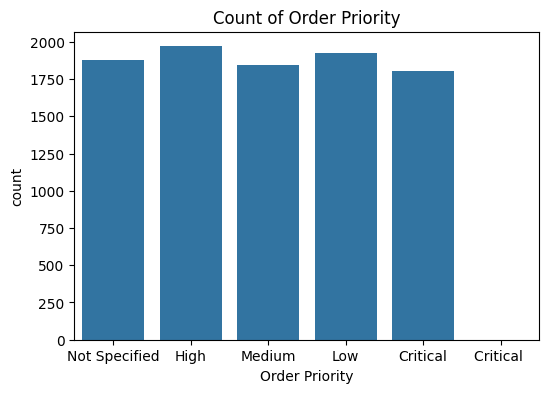

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order Priority",data=dataset)
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority",dpi=2000)
plt.show()

# Ship Mode

In [10]:
dataset["Ship Mode"].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [11]:
x=dataset["Ship Mode"].value_counts().index

In [13]:
y=dataset["Ship Mode"].value_counts().values

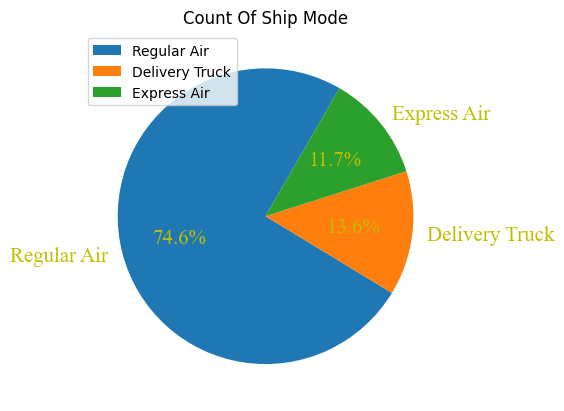

In [72]:
plt.pie(y,labels=x,startangle=60,autopct="%0.1f%%",
       textprops={"color":"y","fontsize":15,"fontname":"Times New Roman"},radius=1)
plt.legend(loc=2)
plt.title("Count Of Ship Mode")
plt.savefig("Ship Mode",dpi=2000)
plt.show()

# Product Category by Shipping Mode

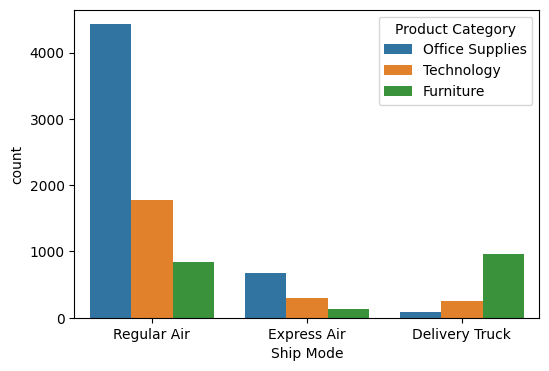

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
plt.show()

# Customer Segment

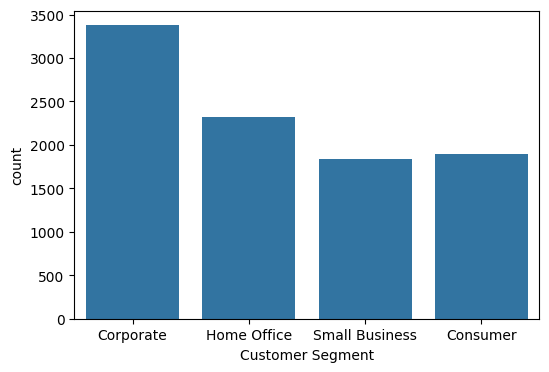

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset)
plt.show()

# Product Category

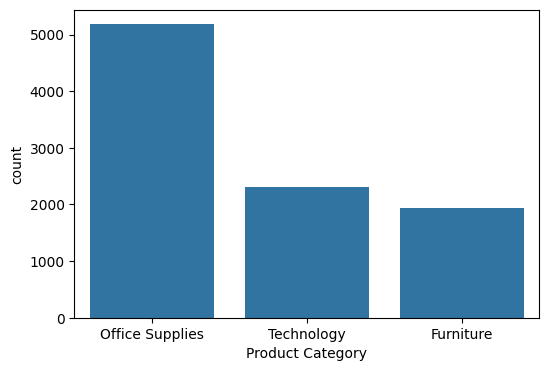

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x="Product Category",data=dataset)
plt.show()

# Product Sub-Category by Office Supplies

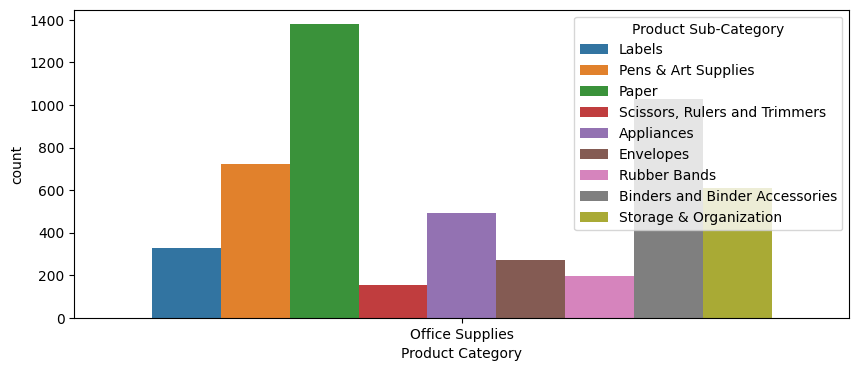

In [36]:
plt.figure(figsize=(10,4))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Office Supplies"],hue="Product Sub-Category")
plt.show()

# Product Sub-Category by Technology

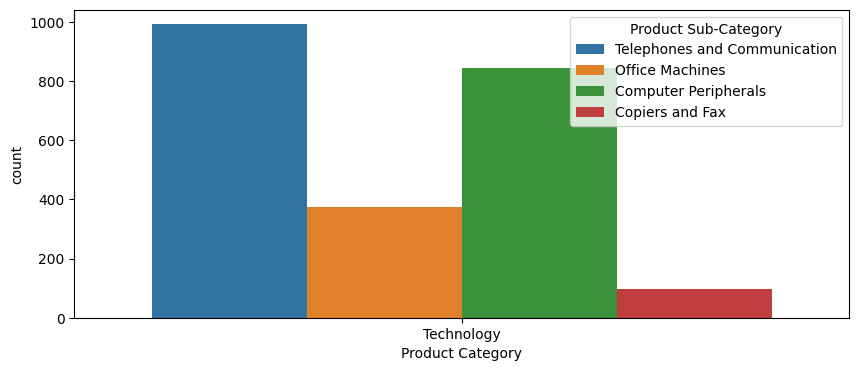

In [44]:
plt.figure(figsize=(10,4))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Technology"],hue="Product Sub-Category")
plt.show()

# Product Sub-Category by Furniture

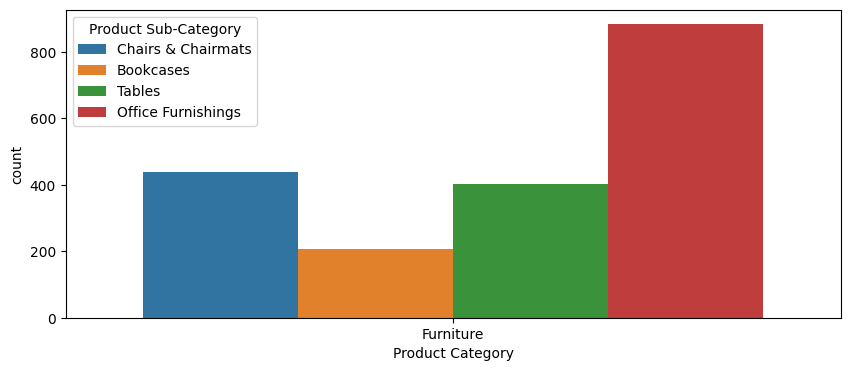

In [45]:
plt.figure(figsize=(10,4))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Furniture"],hue="Product Sub-Category")
plt.show()

# Order Year 

In [51]:
dataset["Order Year"]=dataset["Order Date"].dt.year

In [55]:
dataset["Order Year"].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

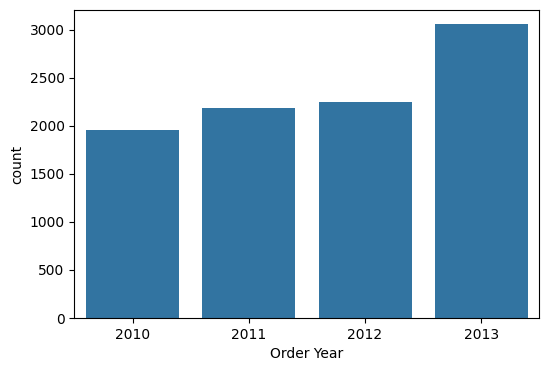

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x="Order Year",data=dataset)
plt.show()

# Profit by Product Category

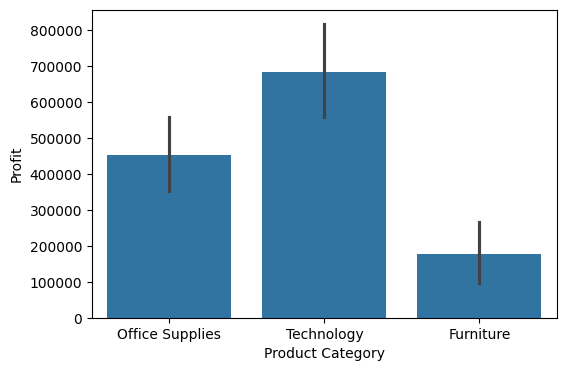

In [61]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator=(sum))
plt.show()

# Top 5 State by order 

In [63]:
dataset["State or Province"].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

# Bottom 5 State by Order 

In [67]:
dataset["State or Province"].value_counts().tail(5)

State or Province
North Dakota    34
South Dakota    28
Wyoming         21
Rhode Island    20
Delaware        15
Name: count, dtype: int64

# Product Base Margin by Product Category

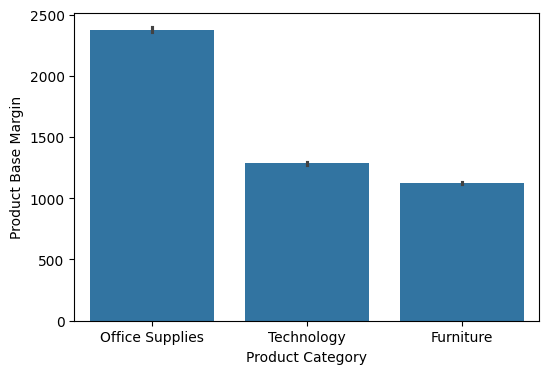

In [70]:
plt.figure(figsize=(6,4))
sns.barplot(x="Product Category",y="Product Base Margin",data=dataset,estimator=(sum))
plt.show()